# Previsão de notas do aluno usando Python

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
notas = pd.read_csv("Student_Marks.csv")
notas.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


## Estatísticas descritivas

In [2]:
notas.describe().round(2)

,number_courses,time_study,Marks
count,100.00,100.00,100.00
mean,5.29,4.08,24.42
std,1.80,2.37,14.33
min,3.00,0.10,5.61
25%,4.00,2.06,12.63
50%,5.00,4.02,20.06
75%,7.00,6.18,36.68
max,8.00,7.96,55.30


## Matriz de correlação

In [3]:
notas.corr().round(4)

,number_courses,time_study,Marks
number_courses,1.0000,0.2048,0.4173
time_study,0.2048,1.0000,0.9423
Marks,0.4173,0.9423,1.0000


# Comportamento da Variável Dependente (Y)

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

<AxesSubplot:title={'center':'Notas dos Alunos'}>

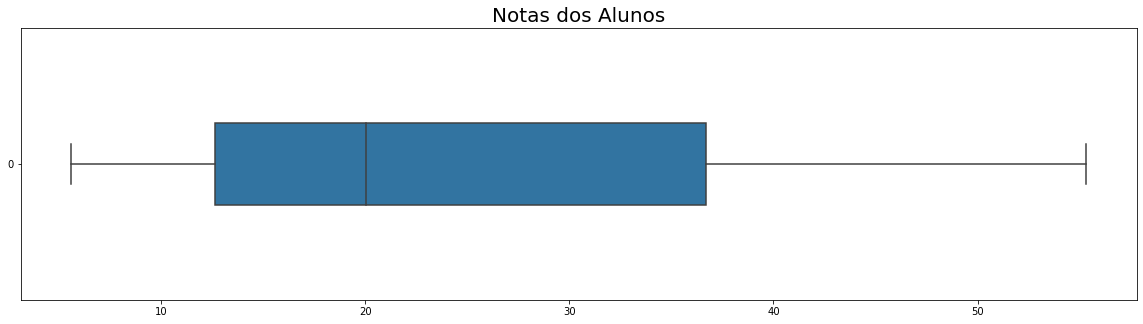

In [4]:
ax = sns.boxplot(data=notas['Marks'], orient='h', width=0.3)
ax.figure.set_size_inches(20, 5)
ax.set_title('Notas dos Alunos', fontsize=20)

ax

## Distribuição de frequências da variável dependente (y)

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências'}, xlabel='Marks', ylabel='Density'>

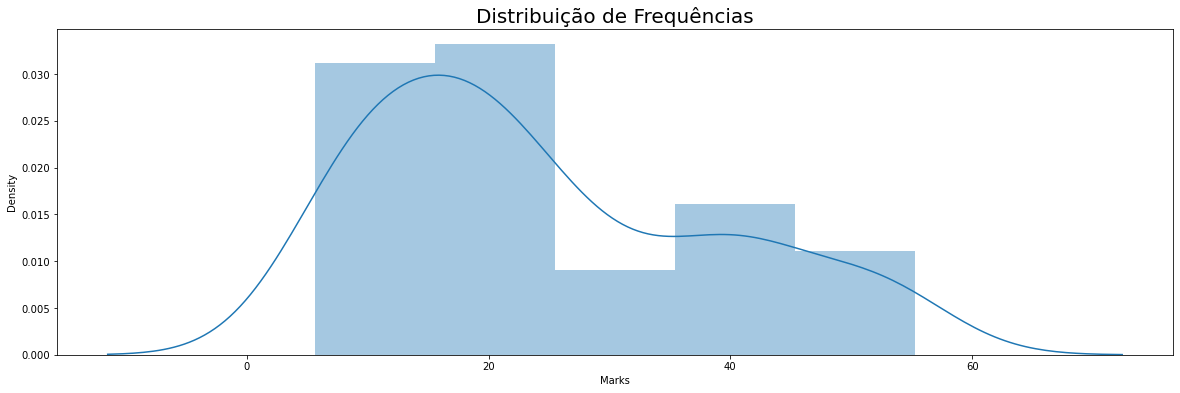

In [5]:
ax = sns.distplot(notas['Marks'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)

ax

## Plota o relacionamento entre pares de variáveis em um dataset.

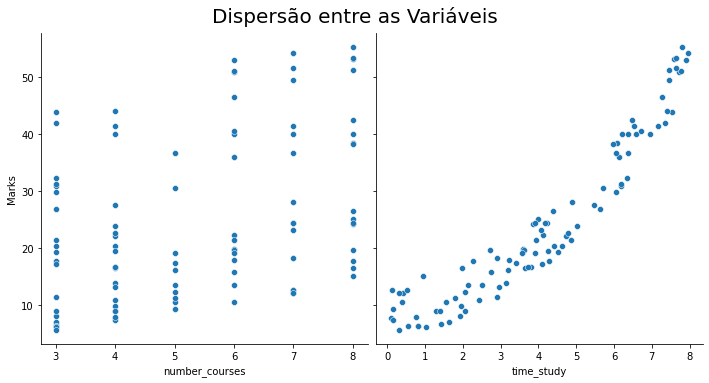

In [6]:
ax = sns.pairplot(notas, y_vars='Marks', x_vars=['number_courses', 'time_study'], height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

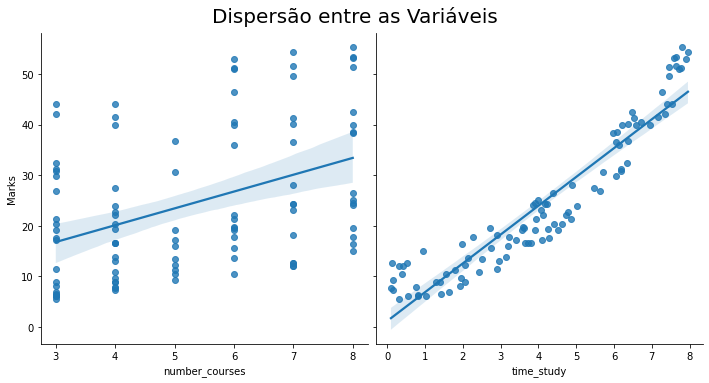

In [7]:
ax = sns.pairplot(notas, y_vars='Marks', x_vars=['number_courses', 'time_study'], kind='reg', height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

In [8]:
# Verificando se tem valores nulls
notas.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

In [9]:
notas.number_courses.unique()

array([3, 4, 6, 8, 5, 7], dtype=int64)

In [10]:
notas.number_courses.value_counts()

3    22
4    21
6    16
8    16
7    15
5    10
Name: number_courses, dtype: int64

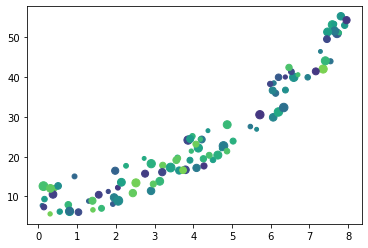

In [11]:
x = notas['time_study']
y = notas['Marks']
# size and color:
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))
# plot
fig, ax = plt.subplots()
ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)

plt.show()

In [12]:
notas.groupby('number_courses')[['time_study', 'Marks']].mean()

,time_study,Marks
number_courses,,
3,3.685773,18.433318
4,3.598524,19.029952
5,3.070600,17.641000
6,4.838750,29.863062
7,4.242667,29.401467
8,4.955750,33.835375


In [13]:
notas.groupby('number_courses')['Marks'].mean()

number_courses
3    18.433318
4    19.029952
5    17.641000
6    29.863062
7    29.401467
8    33.835375
Name: Marks, dtype: float64

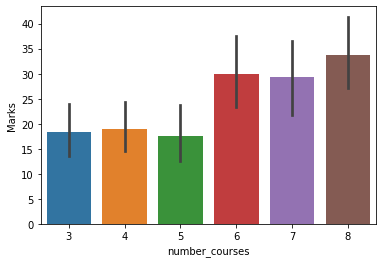

In [14]:
sns.barplot(x='number_courses', y='Marks',data=notas);

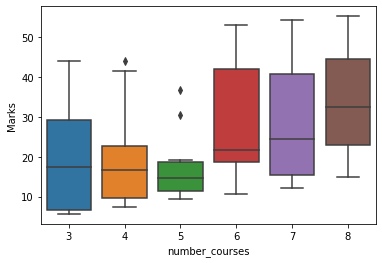

In [15]:
sns.boxplot(x='number_courses', y='Marks',data=notas);

# Criando os Datasets de Treino e Teste

Agora vamos dar uma olhada na correlação entre as notas obtidas pelos alunos e as outras duas colunas nos dados:

In [16]:
correlacao = notas.corr()
correlacao["Marks"].sort_values(ascending=False)

Marks             1.000000
time_study        0.942254
number_courses    0.417335
Name: Marks, dtype: float64

## Modelo de previsão de notas do aluno

In [19]:
x_independetes = np.array(notas[["time_study", "number_courses"]])
y_dependente = np.array(notas["Marks"])
xtrain, xtest, ytrain, ytest = train_test_split(x_independetes, y_dependente, test_size=0.2, random_state=42)

Neste momento vou treinar um modelo de aprendizado usando o algoritmo de regressão linear:

In [20]:
modelo = LinearRegression()
modelo.fit(xtrain, ytrain)
modelo.score(xtest, ytest)

0.9459936100591212

Agora vamos testar o desempenho desse modelo de aprendizado de máquina fornecendo entradas com base nos recursos que usamos para treinar o modelo e prever as notas de um aluno:

In [21]:
entrada = np.array([[4.508, 3]])
modelo.predict(entrada)

array([22.30738483])

# Criando um simulador simples

## Estimando o modelo com statsmodels

In [22]:
import statsmodels.api as sm
x_train_com_constante = sm.add_constant(xtrain)

In [23]:
x_train_com_constante

array([[1.   , 2.913, 7.   ],
       [1.   , 1.803, 5.   ],
       [1.   , 0.508, 7.   ],
       [1.   , 3.591, 6.   ],
       [1.   , 3.948, 6.   ],
       [1.   , 4.26 , 4.   ],
       [1.   , 0.14 , 4.   ],
       [1.   , 0.301, 3.   ],
       [1.   , 6.173, 3.   ],
       [1.   , 4.633, 3.   ],
       [1.   , 0.423, 7.   ],
       [1.   , 4.779, 4.   ],
       [1.   , 6.201, 8.   ],
       [1.   , 0.156, 5.   ],
       [1.   , 6.471, 8.   ],
       [1.   , 3.211, 6.   ],
       [1.   , 5.473, 4.   ],
       [1.   , 2.142, 6.   ],
       [1.   , 7.543, 3.   ],
       [1.   , 5.719, 5.   ],
       [1.   , 3.913, 5.   ],
       [1.   , 4.083, 3.   ],
       [1.   , 3.413, 5.   ],
       [1.   , 3.561, 6.   ],
       [1.   , 4.378, 8.   ],
       [1.   , 3.977, 8.   ],
       [1.   , 2.262, 8.   ],
       [1.   , 1.407, 3.   ],
       [1.   , 3.606, 6.   ],
       [1.   , 4.274, 3.   ],
       [1.   , 3.635, 4.   ],
       [1.   , 7.909, 6.   ],
       [1.   , 6.08 , 8.   ],
       [1.

In [24]:
modelo_statsmodels = sm.OLS(ytrain, x_train_com_constante, hasconst = True).fit()

# Avaliando o Modelo Estimado

In [25]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     548.0
Date:                Tue, 03 May 2022   Prob (F-statistic):           2.90e-46
Time:                        22:05:48   Log-Likelihood:                -212.79
No. Observations:                  80   AIC:                             431.6
Df Residuals:                      77   BIC:                             438.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.6130      1.325     -4.992      0.0